# Makeup or No Makeup (Image)

Target (Y): Given an image, predict whether the person in the image is wearing makeup

1. data 준비

필요한 모듈을 먼저 import 합니다.
이미지를 다루기 위해 opencv 모듈을 사용합니다.

In [182]:
!pip install opencv-python
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

학습할 이미지가 들어있는 directory와 이미지 라벨(makeup, no_makeup)을 list에 담습니다.

In [183]:
DIRECTORY = 'data'
CATEGORIES = ['makeup','no_makeup']

directory에 폴더 이름을 합쳐 경로를 만들어 이미지와 라벨을 가져옵니다. 이때 이미지들을 resize 60으로 하여 가져옵니다. 이미지가 깨지지 않으면서 크기를 조절하기 위해 적절한 값을 60으로 정했습니다.

In [184]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        if img != '.DS_Store':
            img_path = os.path.join(path, img)
            label = CATEGORIES.index(category)
            arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_arr = cv2.resize(arr, (60, 60))
            data.append([new_arr, label])

In [185]:
len(data)

1506

In [186]:
random.shuffle(data)

X에는 이미지 feature를 담고, y에는 feature의 라벨을 담습니다.

In [187]:
X = []
y = []

for features, label in data :
    X.append(features)
    y.append(label)

In [188]:
X = np.array(X)
y = np.array(y)

In [189]:
X.shape

(1506, 60, 60)

In [190]:
y

array([0, 0, 0, ..., 0, 0, 0])

X와 y 변수를 그대로 사용해도 좋지만, 새로운 변수에 옮겨 학습할 예정입니다.

In [191]:
pickle.dump(X, open('X.pk1', 'wb'))
pickle.dump(y, open('y.pk1', 'wb'))

In [192]:
X_pk = pickle.load(open('X.pk1', 'rb'))
y_pk = pickle.load(open('y.pk1', 'rb'))

In [193]:
X_pk

array([[[  6,   9,  21, ...,  94,  93,  94],
        [  7,  20,  27, ...,  97,  97,  98],
        [ 20,  43,  28, ...,  99,  99,  99],
        ...,
        [ 95, 104, 133, ...,  87,  84,  84],
        [125, 129, 123, ...,  86,  85,  85],
        [129, 121, 123, ...,  84,  84,  85]],

       [[128, 129, 132, ..., 127, 123, 122],
        [128, 130, 133, ..., 128, 125, 123],
        [130, 131, 134, ..., 129, 127, 126],
        ...,
        [133, 135, 137, ..., 132, 129, 128],
        [132, 133, 136, ..., 131, 128, 126],
        [131, 132, 135, ..., 130, 127, 126]],

       [[ 17,  20,  47, ...,  37,  50,  38],
        [  7,  16,  39, ...,  36,  43,  46],
        [  7,  40,  36, ...,  24,  36,  48],
        ...,
        [185, 199, 217, ..., 194, 187, 156],
        [140, 157, 174, ..., 193, 196, 188],
        [119, 112, 125, ..., 192, 205, 195]],

       ...,

       [[ 16,  24,  40, ...,  14,  13,  10],
        [ 26,  39,  77, ...,  17,  14,  13],
        [ 33,  49,  64, ...,  19,  15,  15

In [194]:
y_pk

array([0, 0, 0, ..., 0, 0, 0])

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values, e.g. rescale them to the range [0,1].
Dividing the pixel values by the maximum value.

In [195]:
X_pk = X_pk/255

feature data의 차원을 변경합니다.

In [196]:
X_pk = X_pk.reshape(-1, 60, 60, 1)

In [197]:
X_pk

array([[[[0.02352941],
         [0.03529412],
         [0.08235294],
         ...,
         [0.36862745],
         [0.36470588],
         [0.36862745]],

        [[0.02745098],
         [0.07843137],
         [0.10588235],
         ...,
         [0.38039216],
         [0.38039216],
         [0.38431373]],

        [[0.07843137],
         [0.16862745],
         [0.10980392],
         ...,
         [0.38823529],
         [0.38823529],
         [0.38823529]],

        ...,

        [[0.37254902],
         [0.40784314],
         [0.52156863],
         ...,
         [0.34117647],
         [0.32941176],
         [0.32941176]],

        [[0.49019608],
         [0.50588235],
         [0.48235294],
         ...,
         [0.3372549 ],
         [0.33333333],
         [0.33333333]],

        [[0.50588235],
         [0.4745098 ],
         [0.48235294],
         ...,
         [0.32941176],
         [0.32941176],
         [0.33333333]]],


       [[[0.50196078],
         [0.50588235],
         [0.51

2. cnn 모델 만들기

In [198]:
!pip install keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Flatten
from keras.callbacks import TensorBoard
import time

convolution 레이어와 pooling 레이어를 가진 cnn 모델 생성

prior layer should be flattend to be connected to dense layers

dense layer with 50 neurons

final layer with 10 neurons to classify the instances

In [199]:
model = Sequential()
model.add(Conv2D(input_shape = (X_pk.shape[1], X_pk.shape[2], X_pk.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(50, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam,loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])



3. 학습하기
validationg_split은 train data와 test data를 어떤 비율로 나눌지 설정하는 것이다.
batch_size 는
epoch는 반복 횟수 이다.

In [200]:
his = model.fit(X_pk, y_pk, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

4. model 저장

In [201]:
model.save('makeupornomakeup.model')

INFO:tensorflow:Assets written to: makeupornomakeup.model/assets


5. 학습 결과 검증

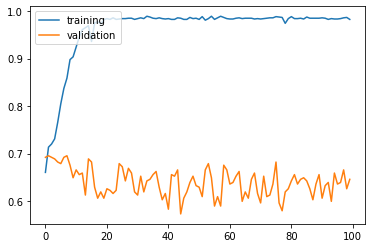

48/48 [==============================] - 1s 12ms/step - loss: 0.3421 - accuracy: 0.9197
Test accuracy:  0.9196547269821167


In [210]:

plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_pk, y_pk)
print('Test accuracy: ', results[1])

6. sample 이미지로 예측 확인하기

In [211]:
import keras
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr

predic_list = []
for img in os.listdir('data/sample') :
    img_path = os.path.join('data/sample', img)
    if img != '.DS_Store':
        predic_list.append(img_path)
for i in range(len(predic_list)) :
    prediction = model.predict([image(predic_list[i])])
    print(predic_list[i])
    print(CATEGORIES[prediction.argmax()])

data/sample/nomakeup3.jpeg
makeup
data/sample/nomakeup2.jpg
no_makeup
data/sample/nomakeup1.jpg
no_makeup
data/sample/makeup2.jpg
makeup
data/sample/makeup3.jpg
makeup
data/sample/makeup1.jpg
makeup


7. 깊은 cnn 구조 생성 및 학습, 검증 결과 확인 

convolution 레이어와 pooling 레이어를 늘린다.

In [230]:
model2 = Sequential()

model2.add(Conv2D(input_shape = (X_pk.shape[1], X_pk.shape[2], X_pk.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model2.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model2.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model2.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))


model2.add(Flatten())
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])


In [231]:
his2 = model2.fit(X_pk, y_pk, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)


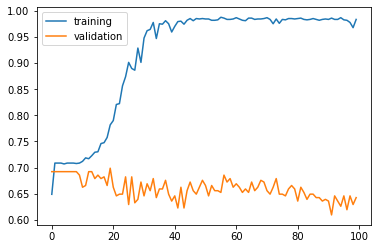

48/48 [==============================] - 6s 124ms/step - loss: 0.4098 - accuracy: 0.9137
Test accuracy:  0.9136786460876465


In [232]:

plt.plot(his2.history['accuracy'])
plt.plot(his2.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results2 = model2.evaluate(X_pk, y_pk)
print('Test accuracy: ', results2[1])